# Quantum walk - PageRank

/var/folders/qb/yvzkjnxj0gg8vb0wffsss18c0000gn/T/ipykernel_39606/1183569141.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob[j] = np.abs(np.dot(np.transpose(np.matmul(scipy.linalg.expm(-1j * H * j), start)), stop)) ** 2


Vertex: 0, rank: 2, prob: 0.19475592342114995
Vertex: 1, rank: 1, prob: 0.3624720330778887
Vertex: 2, rank: 4, prob: 0.16164606904237785
Vertex: 3, rank: 5, prob: 0.11473555641879787
Vertex: 4, rank: 3, prob: 0.1663904180397847


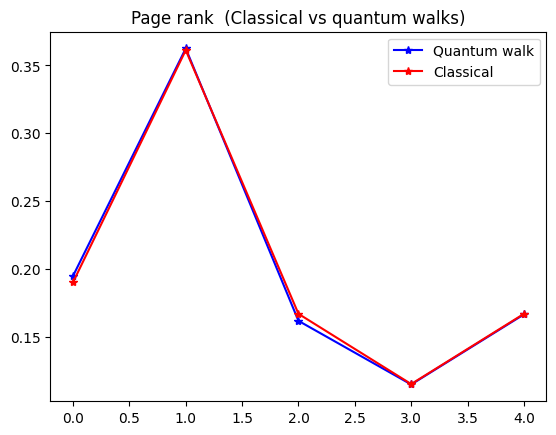

In [11]:
import networkx as nx
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt


def create_graph():
    edges = [(0, 1), (2, 1), (2, 0), (3, 2), (3, 4)]
    return nx.DiGraph(edges)


def hamiltonian(G):
    return nx.directed_laplacian_matrix(G)


def quantum_walk(start, H, steps=1000):
    avg_prob = np.zeros(len(H))
    for i in range(len(H)):
        prob, stop = np.zeros(steps), np.zeros(len(H))
        stop[i] = 1
        for j in range(steps):
            prob[j] = np.abs(np.dot(np.transpose(np.matmul(scipy.linalg.expm(-1j * H * j), start)), stop)) ** 2
        avg_prob[i] = np.average(prob) #replace by max for better approx.
    return avg_prob


def compute_rank(probs):
    sorted_indices = np.argsort(probs)[::-1]
    ranks = np.empty_like(sorted_indices)
    ranks[sorted_indices] = np.arange(len(probs)) + 1
    return ranks


if __name__ == "__main__":
    H = hamiltonian(create_graph())
    start = np.ones((len(H), 1)) / np.sqrt(len(H))
    prob = quantum_walk(start, H)
    rank,x,y = compute_rank(prob),{i: prob[i] for i in range(len(H))},nx.pagerank(create_graph(), alpha=0.90, max_iter=1000)
    print("\n".join(f"Vertex: {i}, rank: {rank[i]}, prob: {prob[i]}" for i in range(len(H))))
    plt.plot(list(x.keys()), list(x.values()), "b*-", label="Quantum walk algorithm"), plt.plot(list(y.keys()), list(y.values()), "r*-", label="Classical"), plt.legend(['Quantum walk', 'Classical']), plt.title("Page rank  (Classical vs quantum walks)"), plt.show()

# Quantum walk fraud detection algorithm

In [13]:
import itertools	
import pprint	
import random	
import networkx as nx	
import pandas as pd	
from matplotlib import pyplot as plt	
fraud = pd.DataFrame({	
    'individual': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],	
    'fraudster': [1, 0, 0, 0, 1, 0, 0, 0]	
})

if __name__ == "__main__":
    G = nx.Graph()	
    G.add_nodes_from(fraud['individual'])	
    for (node1, node2) in itertools.combinations(fraud['individual'], 2):	
        if random.random() < 0.5:	
            G.add_edge(node1, node2)
    H = -nx.adjacency_matrix(G).toarray()
    start = fraud['fraudster']/np.sqrt(2)
    prob = quantum_walk(start, H)
    personalization = fraud.set_index('individual')['fraudster'].to_dict()
    rank,x,y = compute_rank(prob),{i: prob[i] for i in range(len(H))},nx.pagerank(G, alpha=0.85, personalization=personalization)
    print("\n".join(f"Vertex: {i}, rank: {rank[i]}, prob: {prob[i]}" for i in range(len(H))))

Vertex: 0, rank: 7, prob: 0.10183145752812013
Vertex: 1, rank: 1, prob: 0.1602569973005647
Vertex: 2, rank: 3, prob: 0.14390216280211188
Vertex: 3, rank: 5, prob: 0.12238347495985269
Vertex: 4, rank: 2, prob: 0.14846417958922273
Vertex: 5, rank: 6, prob: 0.10787873325240405
Vertex: 6, rank: 8, prob: 0.07882417665101298
Vertex: 7, rank: 4, prob: 0.13645881791670866


# Quantum walk - optimization

The solution to the optimization: 101


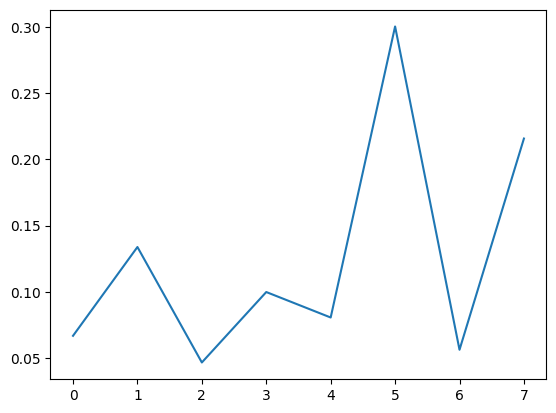

In [4]:
import networkx as nx
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
#min (−2x1x3 − x2x3 − 1x1 + 2x2 − 3x3)


def Graph():
    G = nx.complete_graph(2**3)
    return G


def Hamiltonian(G, coeff):
    H_graph = nx.adjacency_matrix(G).toarray()
    H = H_graph - np.diag(coeff)
    return H


def QW(H):
    start, prob_max, x, x_ax = [1] * len(H) / np.sqrt(len(H)), [0] * len(H), [0] * len(H), [0] * len(H)
    for i in range(0, len(H)):
        prob, stop = [0] * 100, [0] * len(H)
        stop[i] = 1
        for j in range(0, 100):
            prob[j] = (np.absolute(np.inner(np.matmul(scipy.linalg.expm(-1j * H * j), start), stop)) ** 2)
        x[i] = np.average(prob)
        x_ax[i] = i
    return x, x_ax


if __name__ == "__main__":
    G = Graph()
    coeff = [0, -3, 2, -2, -1, -6, 1, -5]
    H = Hamiltonian(G, coeff)
    prob,x_ax = QW(H)
    print("The solution to the optimization:", np.binary_repr(prob.index(max(prob))))
    plt.plot(x_ax, prob)
    plt.show()

# Quantum walk - personalized page rank

In [5]:
import numpy as np
import scipy.optimize


def H():
    user, product, weights = [0, 1, 2], [3, 4, 5], [3, 2, 1]
    H = np.zeros([len(user) + len(product), len(user) + len(product)])
    reco = [(user[0], product[0], weights[0]), (user[0], product[1], weights[1]), (user[1], product[0], weights[1]),
            (user[1], product[1], weights[2]), (user[2], product[2], weights[1]), (user[2], product[0], weights[2])]
    for x in reco:
        H[x[0]][x[1]] = x[2]
        H[x[1]][x[0]] = x[2]
    return H


def probs(H):
    user, product, recos = [0, 1, 2], [3, 4, 5], {}
    for i in user:
        s = [[0] for i in range(0, len(H))]
        s[i] = [1]
        reco = []
        for j in product:
            prob, t = [0] * 100, [[0] for i in range(0, len(H))]
            t[j] = [1]
            for k in range(0, 100):
                prob[k] = np.absolute(np.dot(np.transpose(np.matmul(scipy.linalg.expm(-1j * H * k), s)), t)) ** 2
            reco.append([j, np.average(prob)])
        recos[i] = reco
    return recos


if __name__ == "__main__":
    user = 0
    print(probs(H())[user])

[[3, 0.2827134439046661], [4, 0.17073949745672265], [5, 0.03996647738651895]]
